# 주식 데이터 모델 생성 및 비교

## 라이브러리

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import SimpleRNN, Dense

## seed 값 설정

In [2]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 불러오기

In [3]:
df = pd.read_csv('Project.csv', sep=',', encoding = 'euc-kr')
df = df.drop('Silver($)',axis = 1)
df

,date,Gold,Silver,Dow,Nas,S&P,CNY,EUR,JPY,USD
0,20200731,75628.90,926.271641,26428.32,10745.28,3271.12,170.67,1410.74,1137.32,1191.0
1,20200730,75110.59,897.475847,26313.65,10587.81,3246.22,170.68,1404.82,1138.13,1196.0
2,20200729,75110.45,932.827495,26539.57,10542.94,3258.44,170.56,1401.40,1137.09,1194.0
3,20200728,74342.85,935.967496,26379.28,10402.09,3218.44,171.27,1407.61,1140.26,1199.5
4,20200727,74332.14,942.098478,26584.77,10536.27,3239.41,170.88,1403.60,1136.81,1197.0
...,...,...,...,...,...,...,...,...,...,...
2597,20100806,44660.81,690.243220,10653.56,2288.47,1121.64,171.75,1534.00,1350.28,1163.0
2598,20100805,44870.25,685.811886,10674.98,2293.06,1125.81,172.02,1531.28,1349.94,1165.0
2599,20100804,45009.08,686.874468,10680.43,2303.57,1127.24,172.74,1543.23,1368.42,1170.0
2600,20100803,44425.74,691.629077,10636.38,2283.52,1120.46,172.49,1545.93,1359.20,1168.5


## 종속변수 선정

In [4]:
target = df.Nas
feature = df.drop('Nas', axis = 1)

## 데이터 전처리(0~1값)

In [44]:
# scaler = MinMaxScaler()
# scale_cols = ['date','Gold','Silver','Dow','Nas','S&P','CNY','EUR','JPY','USD']
# df_scaled = scaler.fit_transform(df[scale_cols])

# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = scale_cols

# df_scaled

,date,Gold,Silver,Dow,Nas,S&P,CNY,EUR,JPY,USD
0,1.00000,1.000000,0.378238,0.840378,0.997480,0.950819,0.329709,0.556616,0.367592,0.673394
1,0.99999,0.985719,0.354153,0.834517,0.979281,0.940173,0.330060,0.543688,0.368800,0.691743
2,0.99998,0.985715,0.383721,0.846064,0.974096,0.945398,0.325851,0.536219,0.367250,0.684404
3,0.99997,0.964565,0.386347,0.837872,0.957818,0.928296,0.350754,0.549781,0.371975,0.704587
4,0.99996,0.964270,0.391475,0.848374,0.973325,0.937262,0.337075,0.541023,0.366832,0.695413
...,...,...,...,...,...,...,...,...,...,...
2597,0.00004,0.146723,0.180824,0.034129,0.020159,0.031818,0.367590,0.825795,0.685078,0.570642
2598,0.00003,0.152494,0.177117,0.035224,0.020690,0.033601,0.377061,0.819855,0.684571,0.577982
2599,0.00002,0.156319,0.178006,0.035502,0.021904,0.034212,0.402315,0.845952,0.712122,0.596330
2600,0.00001,0.140246,0.181983,0.033251,0.019587,0.031313,0.393546,0.851849,0.698376,0.590826


In [45]:
# a = ['date','Gold','Silver','Dow','S&P','CNY','EUR','JPY','USD']
# feature = df_scaled[a]
# target = df_scaled['Nas']

## 종속변수 확인

In [19]:
target = target.values
target

array([10745.28, 10587.81, 10542.94, ...,  2303.57,  2283.52,  2295.36])

## 독립변수 확인

In [20]:
feature = feature.values
feature

array([[2.02007310e+07, 7.56289000e+04, 9.26271641e+02, ...,
        1.41074000e+03, 1.13732000e+03, 1.19100000e+03],
       [2.02007300e+07, 7.51105900e+04, 8.97475847e+02, ...,
        1.40482000e+03, 1.13813000e+03, 1.19600000e+03],
       [2.02007290e+07, 7.51104500e+04, 9.32827495e+02, ...,
        1.40140000e+03, 1.13709000e+03, 1.19400000e+03],
       ...,
       [2.01008040e+07, 4.50090800e+04, 6.86874468e+02, ...,
        1.54323000e+03, 1.36842000e+03, 1.17000000e+03],
       [2.01008030e+07, 4.44257400e+04, 6.91629077e+02, ...,
        1.54593000e+03, 1.35920000e+03, 1.16850000e+03],
       [2.01008020e+07, 4.45346300e+04, 6.94507049e+02, ...,
        1.53418000e+03, 1.35269000e+03, 1.17400000e+03]])

## Train & Test셋 7:3 분리

In [24]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size =0.3,
                                                       random_state=0)

In [25]:
y_test

array([ 5228.66,  2864.08,  2181.87,  4488.42,  4775.46,  2709.89,
        5275.91,  2616.67,  6370.46,  2529.14,  5289.66,  4425.97,
        5008.1 ,  6205.26,  4527.69,  4893.84,  4526.06,  3047.08,
        4715.73,  3914.28,  4737.33,  7441.51,  5189.14,  7008.81,
        3064.18,  9375.78,  3459.42,  3120.04,  4835.77,  4899.27,
        4843.55,  5048.29,  3142.13,  2813.84,  3907.07,  4991.94,
        6972.25,  2503.26,  7637.86,  7084.46,  3774.73,  2950.48,
        8410.63,  5091.7 ,  7028.48,  8185.21,  9750.97,  7210.09,
        4419.48,  6750.94,  5574.12,  8030.66,  2744.61,  5153.97,
        4651.62,  3076.21,  2788.33,  2208.63,  3252.87,  3269.33,
        4368.04,  4828.95,  3171.58,  4451.53,  4586.52,  7956.28,
        3076.59,  2153.63,  8046.35,  2925.3 ,  4383.89,  6584.52,
        6207.92,  4748.4 ,  9895.87,  3067.92,  4297.63,  3077.14,
        8161.85,  7959.14,  2782.92,  3121.76,  2649.56,  3030.93,
        4572.56,  4217.39,  6312.47,  4809.88,  7943.32,  7345

In [26]:
# y_test = y_test.reset_index(drop=True)

## 다중 선형 회귀 모델 생성

In [27]:
model = Sequential([
    Dense(2602, input_dim=9, activation='relu'),
    Dense(1301, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2602)              26020     
_________________________________________________________________
dense_4 (Dense)              (None, 1301)              3386503   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1302      
Total params: 3,413,825
Trainable params: 3,413,825
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss="mse",optimizer="adam")

In [29]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('model/imdb_cnn_best_model.h5', 
                     verbose=1, mode='max', save_best_only=True)

In [30]:
model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=20,
                    verbose=2,callbacks=[mc, es])

Train on 1456 samples, validate on 365 samples
Epoch 1/200

Epoch 00001: val_loss improved from -inf to 239448360.76712, saving model to model/imdb_cnn_best_model.h5
1456/1456 - 1s - loss: 2772829605862.1675 - val_loss: 239448360.7671
Epoch 2/200

Epoch 00002: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 115893187.8331 - val_loss: 5450971.9589
Epoch 3/200

Epoch 00003: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 4985668.2232 - val_loss: 4289180.2209
Epoch 4/200

Epoch 00004: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 5083351.3877 - val_loss: 4277557.1764
Epoch 5/200

Epoch 00005: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 5309076.9808 - val_loss: 4663249.2089
Epoch 6/200

Epoch 00006: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 5237265.0992 - val_loss: 4464865.0548
Epoch 7/200

Epoch 00007: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 498

Epoch 62/200

Epoch 00062: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 9680847.8235 - val_loss: 4882835.3938
Epoch 63/200

Epoch 00063: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 16872344.3049 - val_loss: 11988864.8356
Epoch 64/200

Epoch 00064: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 8643773.4657 - val_loss: 11987189.6986
Epoch 65/200

Epoch 00065: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 22158969.8190 - val_loss: 13330761.2329
Epoch 66/200

Epoch 00066: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 41654717.5797 - val_loss: 3199355.5445
Epoch 67/200

Epoch 00067: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 46807010.8163 - val_loss: 3099140.8219
Epoch 68/200

Epoch 00068: val_loss did not improve from 239448360.76712
1456/1456 - 1s - loss: 59171075.8781 - val_loss: 78283699.1781
Epoch 69/200

Epoch 00069: val_loss did not improve f

Epoch 122/200

Epoch 00122: val_loss did not improve from 22170910523.61644
1456/1456 - 1s - loss: 8361328.6542 - val_loss: 6834844.9932
Epoch 123/200

Epoch 00123: val_loss did not improve from 22170910523.61644
1456/1456 - 1s - loss: 8839170.0800 - val_loss: 2835906.8339
Epoch 124/200

Epoch 00124: val_loss did not improve from 22170910523.61644
1456/1456 - 1s - loss: 8207587.2294 - val_loss: 1835040.5124
Epoch 125/200

Epoch 00125: val_loss did not improve from 22170910523.61644
1456/1456 - 1s - loss: 8200869.9430 - val_loss: 3169637.5171
Epoch 126/200

Epoch 00126: val_loss did not improve from 22170910523.61644
1456/1456 - 1s - loss: 13136010.0924 - val_loss: 5025754.1438
Epoch 127/200

Epoch 00127: val_loss did not improve from 22170910523.61644
1456/1456 - 1s - loss: 7044566997.9354 - val_loss: 204299392.4384
Epoch 128/200

Epoch 00128: val_loss did not improve from 22170910523.61644
1456/1456 - 1s - loss: 41290754.8777 - val_loss: 4134906.8938
Epoch 129/200

Epoch 00129: val_lo

In [31]:
from keras.models import load_model
model = load_model('model/imdb_cnn_best_model.h5')

ValueError: Unknown initializer: GlorotUniform

In [32]:
Y_prediction = model.predict(x_test).flatten()
for i in range(500):
    label = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 5228.660, 예상가격: 4976.916
실제가격: 2864.080, 예상가격: 4380.960
실제가격: 2181.870, 예상가격: 4146.728
실제가격: 4488.420, 예상가격: 4700.302
실제가격: 4775.460, 예상가격: 4899.435
실제가격: 2709.890, 예상가격: 4284.279
실제가격: 5275.910, 예상가격: 4969.259
실제가격: 2616.670, 예상가격: 4259.748
실제가격: 6370.460, 예상가격: 5296.568
실제가격: 2529.140, 예상가격: 4310.796
실제가격: 5289.660, 예상가격: 4934.607
실제가격: 4425.970, 예상가격: 4799.015
실제가격: 5008.100, 예상가격: 4921.767
실제가격: 6205.260, 예상가격: 5201.773
실제가격: 4527.690, 예상가격: 4794.623
실제가격: 4893.840, 예상가격: 4896.160
실제가격: 4526.060, 예상가격: 4712.015
실제가격: 3047.080, 예상가격: 4466.675
실제가격: 4715.730, 예상가격: 4878.716
실제가격: 3914.280, 예상가격: 4636.689
실제가격: 4737.330, 예상가격: 4895.041
실제가격: 7441.510, 예상가격: 5640.572
실제가격: 5189.140, 예상가격: 4930.650
실제가격: 7008.810, 예상가격: 5469.154
실제가격: 3064.180, 예상가격: 4528.796
실제가격: 9375.780, 예상가격: 5711.189
실제가격: 3459.420, 예상가격: 4652.351
실제가격: 3120.040, 예상가격: 4539.400
실제가격: 4835.770, 예상가격: 4785.597
실제가격: 4899.270, 예상가격: 4900.923
실제가격: 4843.550, 예상가격: 4896.218
실제가격: 5048.290, 예상가격: 4915.220
실제가격: 31

## 실제값 vs 예측값 비교

In [33]:
pred = model.predict(x_test)

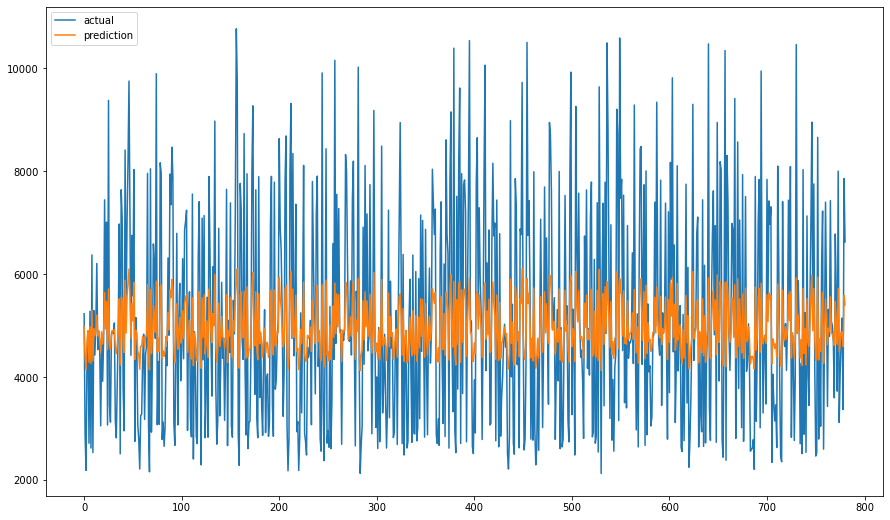

In [34]:
plt.figure(figsize=(15, 9))
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [35]:
y_prediction=model.predict(x_test).flatten()
for i in range(len(y_test)):
    label=y_test[i]
    prediction=y_prediction[i]
    print("실제 가격 : {:.3f}, 예상 가격 : {:,.3f}".format(label, prediction))

실제 가격 : 5228.660, 예상 가격 : 4,976.916
실제 가격 : 2864.080, 예상 가격 : 4,380.960
실제 가격 : 2181.870, 예상 가격 : 4,146.728
실제 가격 : 4488.420, 예상 가격 : 4,700.302
실제 가격 : 4775.460, 예상 가격 : 4,899.435
실제 가격 : 2709.890, 예상 가격 : 4,284.279
실제 가격 : 5275.910, 예상 가격 : 4,969.259
실제 가격 : 2616.670, 예상 가격 : 4,259.748
실제 가격 : 6370.460, 예상 가격 : 5,296.568
실제 가격 : 2529.140, 예상 가격 : 4,310.796
실제 가격 : 5289.660, 예상 가격 : 4,934.607
실제 가격 : 4425.970, 예상 가격 : 4,799.015
실제 가격 : 5008.100, 예상 가격 : 4,921.767
실제 가격 : 6205.260, 예상 가격 : 5,201.773
실제 가격 : 4527.690, 예상 가격 : 4,794.623
실제 가격 : 4893.840, 예상 가격 : 4,896.160
실제 가격 : 4526.060, 예상 가격 : 4,712.015
실제 가격 : 3047.080, 예상 가격 : 4,466.675
실제 가격 : 4715.730, 예상 가격 : 4,878.716
실제 가격 : 3914.280, 예상 가격 : 4,636.689
실제 가격 : 4737.330, 예상 가격 : 4,895.041
실제 가격 : 7441.510, 예상 가격 : 5,640.572
실제 가격 : 5189.140, 예상 가격 : 4,930.650
실제 가격 : 7008.810, 예상 가격 : 5,469.154
실제 가격 : 3064.180, 예상 가격 : 4,528.796
실제 가격 : 9375.780, 예상 가격 : 5,711.189
실제 가격 : 3459.420, 예상 가격 : 4,652.351
실제 가격 : 3120.040, 예상 가격 : 4,

## 표준편차 값

In [36]:
a = 0.0
for i in range(0,len(y_test)):
    a += (y_test[i]-pred[i])**2
b = a / len(y_test)
c = math.sqrt(b)
print(c)

1576.5117348120184


## RNN 모델 생성

In [60]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [61]:
feature, target = make_dataset(feature,target, 20)

In [62]:
x_feature, x_test, y_feature, y_test = train_test_split(feature,target, test_size =0.3,
                                                       random_state=0)

In [63]:
x_train, x_valid, y_train, y_valid = train_test_split(x_feature,y_feature, test_size =0.3,
                                                       random_state=0)

In [64]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(x_train.shape[1], x_train.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [65]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
early_stop = EarlyStopping(monitor='val_loss', patience=30)

In [67]:
checkpoint = ModelCheckpoint('model/imdb_rnn_best_model.h5', 
                     verbose=1, mode='auto', save_best_only=True)

In [68]:
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=20,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Train on 1264 samples, validate on 543 samples
Epoch 1/200
1240/1264 [============================>.] - ETA: 0s - loss: 0.0191
Epoch 00001: val_loss improved from inf to 0.00279, saving model to model/imdb_rnn_best_model.h5
1264/1264 [==============================] - 1s 1ms/sample - loss: 0.0188 - val_loss: 0.0028
Epoch 2/200
1260/1264 [============================>.] - ETA: 0s - loss: 0.0017
Epoch 00002: val_loss improved from 0.00279 to 0.00126, saving model to model/imdb_rnn_best_model.h5
1264/1264 [==============================] - 0s 322us/sample - loss: 0.0017 - val_loss: 0.0013
Epoch 3/200
1240/1264 [============================>.] - ETA: 0s - loss: 8.8081e-04
Epoch 00003: val_loss improved from 0.00126 to 0.00089, saving model to model/imdb_rnn_best_model.h5
1264/1264 [==============================] - 1s 406us/sample - loss: 8.7197e-04 - val_loss: 8.8752e-04
Epoch 4/200
1060/1264 [========================>.....] - ETA: 0s - loss: 6.9251e-04
Epoch 00004: val_loss improved from

Epoch 65/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.5127e-04
Epoch 00065: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 251us/sample - loss: 1.5056e-04 - val_loss: 2.5155e-04
Epoch 66/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.6106e-04
Epoch 00066: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 253us/sample - loss: 1.5917e-04 - val_loss: 2.6376e-04
Epoch 67/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.9368e-04
Epoch 00067: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 254us/sample - loss: 1.9394e-04 - val_loss: 2.9554e-04
Epoch 68/200
1220/1264 [===========================>..] - ETA: 0s - loss: 2.0851e-04
Epoch 00068: val_loss did not improve from 0.00021
1264/1264 [==============================] - 0s 249us/sample - loss: 2.0791e-04 - val_loss: 2.4946e-04
Epoch 69/200
1220/1264 [====================

Epoch 98/200
1200/1264 [===========================>..] - ETA: 0s - loss: 1.3585e-04
Epoch 00098: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 258us/sample - loss: 1.3485e-04 - val_loss: 1.7145e-04
Epoch 99/200
1240/1264 [============================>.] - ETA: 0s - loss: 1.4004e-04
Epoch 00099: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 250us/sample - loss: 1.3926e-04 - val_loss: 3.7435e-04
Epoch 100/200
1160/1264 [==========================>...] - ETA: 0s - loss: 1.5036e-04
Epoch 00100: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 269us/sample - loss: 1.4941e-04 - val_loss: 1.8652e-04
Epoch 101/200
1220/1264 [===========================>..] - ETA: 0s - loss: 1.4515e-04
Epoch 00101: val_loss did not improve from 0.00016
1264/1264 [==============================] - 0s 251us/sample - loss: 1.4850e-04 - val_loss: 2.2516e-04
Epoch 102/200
1020/1264 [=================

Epoch 165/200
1100/1264 [=========================>....] - ETA: 0s - loss: 1.1634e-04
Epoch 00165: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 229us/sample - loss: 1.1530e-04 - val_loss: 2.3435e-04
Epoch 166/200
1080/1264 [========================>.....] - ETA: 0s - loss: 2.1065e-04
Epoch 00166: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 233us/sample - loss: 2.1719e-04 - val_loss: 1.4676e-04
Epoch 167/200
1040/1264 [=======================>......] - ETA: 0s - loss: 1.3245e-04
Epoch 00167: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 239us/sample - loss: 1.3221e-04 - val_loss: 1.5278e-04
Epoch 168/200
1080/1264 [========================>.....] - ETA: 0s - loss: 1.1021e-04
Epoch 00168: val_loss did not improve from 0.00012
1264/1264 [==============================] - 0s 231us/sample - loss: 1.1381e-04 - val_loss: 1.3968e-04
Epoch 169/200
1260/1264 [===============

## 실제값 vs 예측값 비교

In [69]:
pred = model.predict(x_test)

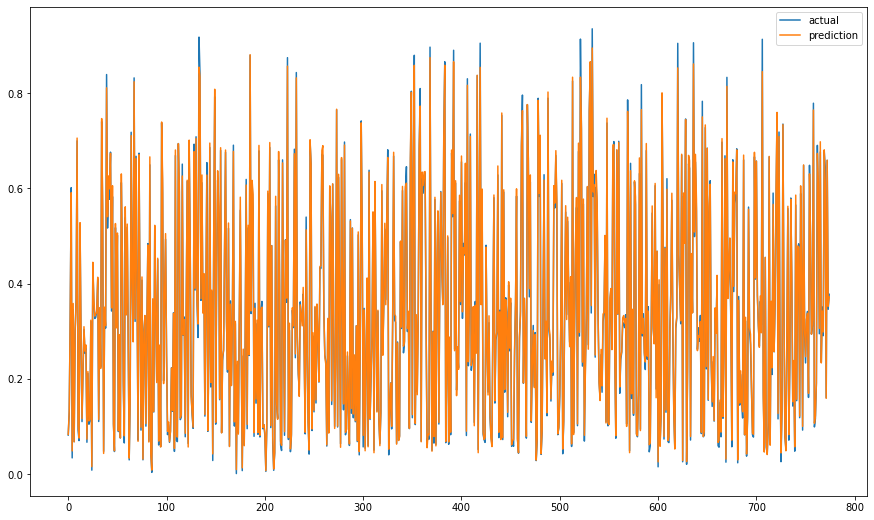

In [70]:
plt.figure(figsize=(15, 9))
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [71]:
y_prediction=model.predict(x_test).flatten()
for i in range(len(y_test)):
    label=y_test[i]
    prediction=y_prediction[i]
    print("실제 가격 : {:.3f}, 예상 가격 : {:,.3f}".format(label, prediction))

실제 가격 : 0.082, 예상 가격 : 0.083
실제 가격 : 0.128, 예상 가격 : 0.133
실제 가격 : 0.329, 예상 가격 : 0.331
실제 가격 : 0.601, 예상 가격 : 0.591
실제 가격 : 0.034, 예상 가격 : 0.048
실제 가격 : 0.345, 예상 가격 : 0.358
실제 가격 : 0.068, 예상 가격 : 0.067
실제 가격 : 0.297, 예상 가격 : 0.302
실제 가격 : 0.369, 예상 가격 : 0.357
실제 가격 : 0.700, 예상 가격 : 0.706
실제 가격 : 0.093, 예상 가격 : 0.102
실제 가격 : 0.070, 예상 가격 : 0.075
실제 가격 : 0.521, 예상 가격 : 0.528
실제 가격 : 0.281, 예상 가격 : 0.292
실제 가격 : 0.110, 예상 가격 : 0.116
실제 가격 : 0.215, 예상 가격 : 0.220
실제 가격 : 0.303, 예상 가격 : 0.309
실제 가격 : 0.254, 예상 가격 : 0.258
실제 가격 : 0.269, 예상 가격 : 0.271
실제 가격 : 0.067, 예상 가격 : 0.073
실제 가격 : 0.211, 예상 가격 : 0.215
실제 가격 : 0.104, 예상 가격 : 0.111
실제 가격 : 0.111, 예상 가격 : 0.115
실제 가격 : 0.321, 예상 가격 : 0.323
실제 가격 : 0.008, 예상 가격 : 0.015
실제 가격 : 0.437, 예상 가격 : 0.445
실제 가격 : 0.362, 예상 가격 : 0.369
실제 가격 : 0.327, 예상 가격 : 0.332
실제 가격 : 0.329, 예상 가격 : 0.336
실제 가격 : 0.344, 예상 가격 : 0.339
실제 가격 : 0.409, 예상 가격 : 0.413
실제 가격 : 0.110, 예상 가격 : 0.114
실제 가격 : 0.348, 예상 가격 : 0.349
실제 가격 : 0.225, 예상 가격 : 0.222
실제 가격 : 0.740,

## 표준편차 값

In [72]:
a = 0.0
for i in range(0,len(y_test)):
    a += (y_test[i]-pred[i])**2
b = a / len(y_test)
c = math.sqrt(b)
print(c)

0.011684673031300849


## Tree모델 생성

In [97]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size =0.3,
                                                       random_state=0)

In [98]:
x_train.shape

(1807, 20, 9)

In [99]:
x_test.shape

(775, 20, 9)

In [101]:
x_train = x_train.reshape((1807,20*9))
x_test = x_test.reshape((775,20*9))

In [102]:
x_train.shape

(1807, 180)

In [103]:
x_test.shape

(775, 180)

In [104]:
dt_clf = dt_clf.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'